Đồ án cuối kỳ
Thành viên:
Họ tên: Trần Phúc Nguyên
MSSV: 18120488
Họ tên: Trần Thành Long
MSSV: 18120455

## Import các thư viện cần thiết

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


---

## Thu thập dữ liệu

Trong bài này, ta sẽ dùng dữ liệu đã được thu thập sẵn là file "vgsales.csv" đính kèm; đây là dữ liệu về danh sách các video game đã bán hơn 100,000 bản("vgsales" là viết tắt của "video games sales"). Dữ liệu này được lấy từ trang Kaggle link trang:(https://www.kaggle.com/gregorut/videogamesales). \
Lần cuối dữ liệu được update là 26/10/2016.
Dữ liệu được thu thập bằng cách sử dụng BeautifulSoup của Python(link script: https://github.com/GregorUT/vgchartzScrape.) để cào dữ liệu từ website vgchartz.com.
Dữ liệu không có License.

---

## Khám phá dữ liệu

### Đọc dữ liệu từ file csv vào dataframe

In [2]:
vgsales_df = pd.read_csv('vgsales.csv')
vgsales_df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


### Dữ liệu gồm có bao nhiêu dòng và bao nhiêu cột?

In [3]:
num_rows, num_cols = vgsales_df.shape
num_rows, num_cols

(16598, 11)

### Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?

Theo mô tả dữ liệu của nguồn từ trang Kaggle và theo quan sát sơ bộ về dữ liệu thì một dòng cho biết thông tin về sales của một tựa game nào đó. Có vẻ không có dòng nào bị "lạc loài".

### Dữ liệu có các dòng bị lặp không?

In [4]:
vgsales_df.duplicated().any()

False

### Mỗi cột có ý nghĩa gì?

Dưới đây là phần mô tả của nguồn từ trang Kaggle về các cột trong file "vgsales.csv"

- **Rank:** Ranking of overall sales

- **Name:** The games name

- **Platform:** Platform of the games release (i.e. PC,PS4, etc.)

- **Year:** Year of the game's release

- **Genre:** Genre of the game

- **Publisher:** Publisher of the game

- **NA_Sales:** Sales in North America (in millions)

- **EU_Sales:** Sales in Europe (in millions)

- **JP_Sales:** Sales in Japan (in millions)

- **Other_Sales:** Sales in the rest of the world (in millions)

- **Global_Sales:** Total worldwide sales.

### Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp không? 

In [5]:
vgsales_df.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

`vgsales_df` có 4 cột có `dtype` là `object`: "Name", "Platform", "Genre", "Publisher". Trong HW3, chúng ta đã hiểu về ý nghĩa của `object` trong Pandas. Chúng ta cũng sẽ viết một hàm nhận đầu vào là một cột `s` (series) có `dtype` là `object` và trả về tập các kiểu dữ liệu thật sự có trong cột này.

In [6]:
def open_object_dtype(s):
    dtypes = set()
    s.apply(lambda x: dtypes.add(type(x)))
    return dtypes

In [7]:
print(open_object_dtype(vgsales_df['Name']))
print(open_object_dtype(vgsales_df['Platform']))
print(open_object_dtype(vgsales_df['Genre']))
print(open_object_dtype(vgsales_df['Publisher']))

{<class 'str'>}
{<class 'str'>}
{<class 'str'>}
{<class 'str'>, <class 'float'>}


Chúng ta sẽ kiểm tra xem tại sao lại có các gìá trị `float` ở cột `Year` và cột `Publisher`. Dự đoán có thể là do sự tồn tại của các giá trị NaN ở các cột này. Chúng ta sẽ kiểm tra thử số lượng các giá trị NaN của các cột.

In [31]:
vgsales_df.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

Như vậy dự đoán của chúng ta là chính xác, sự xuất hiện của các giá trị NaN ở cột `Year` và `Publisher` có thể là do các tựa game này là một các tựa game nhỏ được phát triển bởi vài cá nhân, nên chúng ta không có thông tin chi tiết về.

**Vấn đề cần tiền xử lý:**
- Cột `Year` không nhất thiết phải chuyển về `int`, nên chúng ta sẽ tạm sử dụng dtype `float` vì có sự xuất hiện của các giá trị NaN.
- Cột "Publisher" có dtype gồm 2 loại là `str` và `float`. Nếu kiểm tra thêm thì chúng ta sẽ thấy `float` là ứng với `NaN`, còn `str` là ứng với tên của nhà phát hành.  Để có thể tiếp tục khám phá thêm về cột này, ta cũng sẽ thực hiện bước tiền xử lý là chuyển tất cả sang dtype là `str`. Những cột có giá trị NaN sẽ được để khoảng trống.

---

## Tiền xử lý

### Chuyển dtype của cột `Publisher` về str:

Chúng ta sẽ fill các giá trị NaN bằng `''`, sau đó sử dụng `astype` để đưa type thực sự về `str`.

In [42]:
vgsales_df['Publisher'] = vgsales_df['Publisher'].fillna('').astype('str')
open_object_dtype(vgsales_df['Publisher'])

{str}

---

## Khám phá dữ liệu (tiếp tục)

### Với mỗi cột có kiểu dữ liệu dạng numeric, các giá trị được phân bố như thế nào?

#### Định nghĩa hàm *`missing_ratio`*:

In [51]:
def missing_ratio(s):
    return s.isna().mean() * 100

Hiện có 7 cột có vẻ là thuộc nhóm numeric: `Rank`, `Year`, `NA_Sales`, `EU_Sales`, `JP_Sales`, `Other_Sales`, `Global_Sales`. Tuy nhiên, cột `Rank` có vẻ thuộc nhóm categorical. Như vậy, chỉ có 5 cột numeric là `NA_Sales`, `EU_Sales`, `JP_Sales`, `Other_Sales`, `Global_Sales`. 

Với mỗi cột numeric chúng ta sẽ tính tỉ lệ % giá trị thiếu (từ 0 đến 100), min, max. Dataframe kết quả có 3 dòng là "missing_ratio", "min", "max"; và có 7 cột là `Year`, `NA_Sales`, `EU_Sales`, `JP_Sales`, `Other_Sales`, `Global_Sales`.

In [59]:
nume_col_profiles_df = vgsales_df[["Year", "NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales"]].agg(\
    [missing_ratio, 'min', 'max'])
nume_col_profiles_df

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
missing_ratio,1.632727,0.00,0.00,0.00,0.00,0.00
min,1980.000000,0.00,0.00,0.00,0.00,0.01
max,2020.000000,41.49,29.02,10.22,10.57,82.74


Như đã phân tích, các dòng của cột `Year` sẽ có giá trị thiếu, các cột còn lại đều không có giá trị thiếu. Min và max của các cột có vẻ không có gì bất thường.

### Với mỗi cột có kiểu dữ liệu dạng categorical, các giá trị được phân bố như thế nào?

`vgsales_df` có 6 cột categorical là `Rank`, `Name`, `Platform`, `Genre`, `Publisher`.

Với mỗi cột categorical, chúng ta sẽ tính tỉ lệ % giá trị thiếu (từ 0 đến 100), số lượng giá trị khác nhau, list/array một vài các giá trị khác nhau. Dataframe kết quả có 3 dòng là "missing_ratio", "num_diff_vals", "some_diff_vals"; và có 5 cột là `Rank`, `Name`, `Platform`, `Genre`, `Publisher`.

In [58]:
# YOUR CODE HERE
cate_col_profiles_df = vgsales_df[['Rank', 'Name', 'Platform', 'Genre', 'Publisher']].agg(\
    [missing_ratio, 'nunique', 'unique'])
cate_col_profiles_df = cate_col_profiles_df.rename(index={'nunique':'num_diff_vals', 'unique':'some_diff_vals'})
cate_col_profiles_df

,Rank,Name,Platform,Genre,Publisher
missing_ratio,0.0,0.0,0.0,0.0,0.0
num_diff_vals,16598,11493,31,12,579
some_diff_vals,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[Wii Sports, Super Mario Bros., Mario Kart Wii...","[Wii, NES, GB, DS, X360, PS3, PS2, SNES, GBA, ...","[Sports, Platform, Racing, Role-Playing, Puzzl...","[Nintendo, Microsoft Game Studios, Take-Two In..."


---

## Đưa ra các câu hỏi cần trả lời

Sau khi đã khám phá dữ liệu và hiểu hơn về dữ liệu, ta thấy có một số câu hỏi có thể được trả lời bằng dữ liệu:
1. Số lượng các game được bán ra trên 100.000 bản thay đổi như thế nào theo năm? Đưa ra nhận xét và giải thích về sự thay đổi đó?
    - *Ý nghĩa: Cung cấp một cái nhìn trực quan mức độ tăng trưởng của thị trường ngành công nghiệp phát triển video game qua từng năm.*
2. Top 3 thể loại game được mua nhiều nhất ở từng khu vực theo từng năm?
    - *Ý nghĩa: Biết được thể loại game yêu thích của từng khu vực cũng như toàn thế giới. Qua đó có thể có các chiến lược marketing đúng đắn cho từng khu vực.*
3. Nhà phát triển dẫn đầu về doanh số bán ra theo từng khu vực trên thế giới trong 5 năm gần đây. Nguyên nhân nào giúp cho những nhà phát triển này hiện đang dẫn đầu?
    - *Ý nghĩa: Tìm ra nhà phát triển game được quan tâm nhiều nhất theo từng khu vực, từ đây ta có thể tiếp tục phân tích về cách các nhà phát triển này tạo ra những game như thế nào để giúp cho họ hiện đang dẫn đầu.*
4. Platform nào đang dẫn đầu trong 5 năm gần đây trên từng khu vực và toàn thế giới?
    - *Ý nghĩa: Từ đây, các nhà phát triển game sẽ biết được game của họ phát triển trên nền tảng nào sẽ thu hút được nhiều lượt mua của người dùng.*

---

## Tiền xử lý


Có vẻ dữ liệu đã ổn để trả lời các câu hỏi, không cần phải xử lý gì thêm.

---

## Phân tích dữ liệu để trả lời cho các câu hỏi 

### Số lượng các game được bán ra trên 100.000 bản thay đổi như thế nào theo năm? Đưa ra nhận xét và giải thích về sự thay đổi đó?
Để trả lời cho câu hỏi này, chúng ta sẽ làm như sau:
- Bước 1: Tính số lượng video game bán được trên 100.000 bản mỗi năm. Kết quả được lưu vào series `vg_each_year`.
- Bước 2: Từ kết quả ở trên, chúng ta sẽ vẽ đồ thị dạng line, trong đó trục hoành là năm và trục tung là số lượng game được bán ra mỗi năm. Chúng ta dùng thêm marker là điểm tròn để cho thấy rõ các điểm dữ liệu. Tên trục hoành là "Year" và tên trục tung là "NumSaledGames".
- Bước 3: Từ biểu đồ trên, đưa ra nhận xét về sự thay đổi về số lượng các game bán được trên 100.000 bản theo từng năm. 

Code bước 1.

In [127]:
vg_each_year = vgsales_df[["Year"]].groupby("Year").size()
vg_each_year

Year
1980.0       9
1981.0      46
1982.0      36
1983.0      17
1984.0      14
1985.0      14
1986.0      21
1987.0      16
1988.0      15
1989.0      17
1990.0      16
1991.0      41
1992.0      43
1993.0      60
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1998.0     379
1999.0     338
2000.0     349
2001.0     482
2002.0     829
2003.0     775
2004.0     763
2005.0     941
2006.0    1008
2007.0    1202
2008.0    1428
2009.0    1431
2010.0    1259
2011.0    1139
2012.0     657
2013.0     546
2014.0     582
2015.0     614
2016.0     344
2017.0       3
2020.0       1
dtype: int64

Code tiếp bước 2.

Text(0, 0.5, 'NumSaledGames')

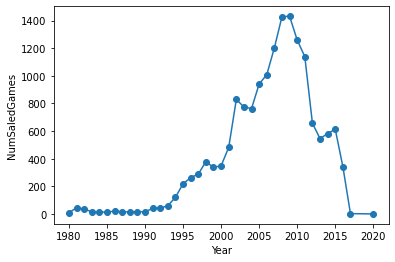

In [82]:
line_plot = vg_each_year.plot.line(marker='o')
line_plot.set_ylabel("NumSaledGames")

**Nhận xét:**
Số lượng game bán trên 100.000 bản từ 1980 tăng dần và chạm đỉnh vào khoảng cuối thập niên đầu của thế kỉ 21, sau đó lại tụt dốc liên tục cho tới cuối năm 2020. Có nhiều lý do để giải thích cho điều này, tôi sẽ đưa ra một vài lý do khả thi như:
1. Những năm khoảng trước năm 95 của thế kỉ trước, do công nghệ còn chưa hiện đại, internet và marketing không được hiện đại như bây giờ, cũng như chất lượng game không cao. Từ đó suy ra, trừ một số game cực kì nổi tiếng như Super Mario Bros, Pokemon Red/Blue,... thì game thời kì đó rất khó tiếp cận với người chơi, dẫn đến việc các game có số lượng bán lớn là rất ít. 
2. Từ sau những năm 95 của thế kỉ trước cho đến khoảng cuối thập kỉ đầu của thế kỉ 21, khi internet và công nghệ phổ biến hơn với mọi người, nhu cầu mua game để giải trí cũng tăng cao. Đặc biệt vào hai năm 2005, 2006, việc hai platform nổi tiếng là Xbox 360 và PS3 được tung ra đã khiến số lượng game bán ra được trên 100.000 bản tăng lên rất cao. 
3. Từ sau 2011, đồ thị có chiều hướng đi xuống rất nhanh, có thể do những game release gần đây chưa có đủ thời gian để có thể đạt tới doanh số 100.000 bản. Đồ thị có tăng ở thời điểm những năm 2013-2016, có thể là do sự ra mắt có platform PS4. Một ý quan trọng khác là trong khoảng thời gian này, xu hướng mọi người trên toàn thế giới chuyển qua chơi các tựa game online miễn phí và game mobile ngày càng nhiều, khiến cho việc người chơi video games giảm sút rõ rệt. 

### Top 3 thể loại game được mua nhiều nhất ở từng khu vực theo từng năm?
Để trả lời cho câu hỏi này, chúng ta sẽ làm như sau:
- Bước 1: Khai báo hàm `top_genre_each_year_by_region` nhận vào tên cột của khu vực để tìm ra top 3 thể loại game có số lượng bán nhiều nhất ở khu vực đó.
- Bước 2: Sử dụng hàm trên để tìm ra top các thể loại game ở NA, EU, JP, other và global. Sau đó concat các series trên thành một dataframe kết quả.

Code bước 1.

In [144]:
def top_genre_each_year_by_region(column):
    number_genre_each_year = vgsales_df.groupby(["Year", "Genre"])[column].sum().unstack(0)
    top_genre_each_year_by_region = number_genre_each_year.apply(lambda s: s.nlargest(3).index.tolist())
    return top_genre_each_year_by_region

Code bước 2.

In [157]:
top_NA = top_genre_each_year_by_region("NA_Sales")
top_EU = top_genre_each_year_by_region("EU_Sales")
top_JP = top_genre_each_year_by_region("JP_Sales")
top_other =  top_genre_each_year_by_region("Other_Sales")
top_global = top_genre_each_year_by_region("Global_Sales")

df = pd.concat([top_NA,top_EU, top_JP, top_other, top_global], axis=1)
df.columns = ["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales"]
df.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Year,,,,,
1980.0,"[Shooter, Misc, Fighting]","[Shooter, Misc, Fighting]","[Action, Fighting, Misc]","[Shooter, Misc, Fighting]","[Shooter, Misc, Fighting]"
1981.0,"[Action, Shooter, Platform]","[Action, Shooter, Platform]","[Action, Platform, Puzzle]","[Action, Shooter, Platform]","[Action, Shooter, Platform]"
1982.0,"[Puzzle, Action, Platform]","[Puzzle, Action, Platform]","[Action, Misc, Platform]","[Puzzle, Platform, Action]","[Puzzle, Action, Platform]"
1983.0,"[Platform, Action, Sports]","[Platform, Action, Sports]","[Platform, Sports, Misc]","[Platform, Action, Sports]","[Platform, Sports, Action]"
1984.0,"[Shooter, Racing, Sports]","[Shooter, Racing, Sports]","[Sports, Racing, Puzzle]","[Shooter, Racing, Sports]","[Shooter, Sports, Racing]"
